<a href="https://colab.research.google.com/github/vngeno/BLUE_CARS_PARIS/blob/main/BLUE_CARS%2C_PARIS_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title IMPORTING OUR LIBRARIES



In [2]:
import pandas as pd
import numpy as np

In [3]:
#@title LOADING OUR DATASET


In [4]:
#loading dataset
df = pd.read_csv('Autolib_dataset (2).csv')
df.head()


,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [5]:
#@title ACCESSING INFORMATION ON THE DATASET


In [6]:
df.info() #accessing info on the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [7]:
#@title CLEANING OUR DATA


In [8]:
#dropping irrelevant columns then accessing info afterwards
df.drop(['Displayed comment','Scheduled at','Geo point','Subscription status','Status','Kind'],axis = 1,inplace = True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Address             5000 non-null   object
 1   Cars                5000 non-null   int64 
 2   Bluecar counter     5000 non-null   int64 
 3   Utilib counter      5000 non-null   int64 
 4   Utilib 1.4 counter  5000 non-null   int64 
 5   Charge Slots        5000 non-null   int64 
 6   Charging Status     5000 non-null   object
 7   City                5000 non-null   object
 8   ID                  5000 non-null   object
 9   Postal code         5000 non-null   int64 
 10  Public name         5000 non-null   object
 11  Rental status       5000 non-null   object
 12  Slots               5000 non-null   int64 
 13  Station type        5000 non-null   object
 14  year                5000 non-null   int64 
 15  month               5000 non-null   int64 
 16  day                 5000

In [9]:
#Using the lstrip() function of .str method to check the variables with the leading and trailing spaces.
df['Charging Status'] = df['Charging Status'].str.lstrip()
df['Charging Status']

0       nonexistent
1       operational
2       operational
3       operational
4       nonexistent
           ...     
4995    nonexistent
4996    operational
4997    operational
4998    nonexistent
4999    operational
Name: Charging Status, Length: 5000, dtype: object

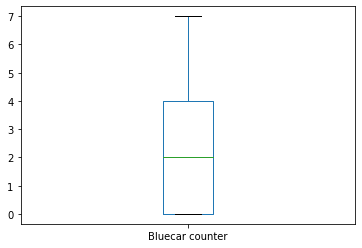

In [10]:
#dropping outliers
#plotting a boxplot to check on any outliers in the bluecar counter column
df.boxplot(column=['Bluecar counter'], grid= False)

#there are no outliers in the bluecar counter column

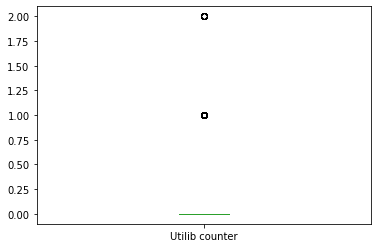

In [11]:
#plotting a boxplot to check for outliers in the utilib column
df.boxplot(column=['Utilib counter'], grid=False)

#the below image shows that there are outliers in the utilib counter column

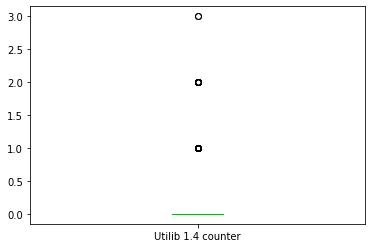

In [12]:
#plotting a boxplot to check for outliers in the utilib 1.4 counter column
df.boxplot(column=['Utilib 1.4 counter'], grid=False)

#this shows that there are outliers in the utilib 1.4 column

In [13]:
#We will now drop the outliers
cols = ['Utilib counter','Utilib 1.4 counter']
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df= df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)] #renaming our new dataset df1

df.shape #getting the shape of our new dataset

(4210, 19)

In [14]:
#dropping duplicates
df.drop_duplicates().any()

Address                True
Cars                   True
Bluecar counter        True
Utilib counter        False
Utilib 1.4 counter    False
Charge Slots           True
Charging Status        True
City                   True
ID                     True
Postal code            True
Public name            True
Rental status          True
Slots                  True
Station type           True
year                   True
month                  True
day                    True
hour                   True
minute                 True
dtype: bool

In [15]:
# Checking how many missing values there are across each column
df.isnull().sum() #shows we have no missing values at all hence we will not drop any.

Address               0
Cars                  0
Bluecar counter       0
Utilib counter        0
Utilib 1.4 counter    0
Charge Slots          0
Charging Status       0
City                  0
ID                    0
Postal code           0
Public name           0
Rental status         0
Slots                 0
Station type          0
year                  0
month                 0
day                   0
hour                  0
minute                0
dtype: int64

In [16]:
df.value_counts() #checking value counts in each column

Address                  Cars  Bluecar counter  Utilib counter  Utilib 1.4 counter  Charge Slots  Charging Status  City        ID                             Postal code  Public name                      Rental status  Slots  Station type  year  month  day  hour  minute
Quai de SÃ¨vres          6     6                0               0                   0             nonexistent      SÃ¨vres     sevres-manufacturenationale-1  92310        SÃ¨vres/Manufacture Nationale/1  operational    0      station       2018  4      7    16    31        1
19 rue de Chateaubriand  5     5                0               0                   0             operational      Paris       paris-chateaubriand-19         75008        Paris/Chateaubriand/19           operational    1      station       2018  4      3    10    6         1
                         1     1                0               0                   1             operational      Paris       paris-chateaubriand-19         75008        Paris/

In [17]:
#Adding relevant columns to our dataset
df['datetime']= pd.to_datetime(df[['year','month','day','hour','minute']])
df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Postal code,Public name,Rental status,Slots,Station type,year,month,day,hour,minute,datetime
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,75015,Paris/Suffren/2,operational,2,station,2018,4,8,11,43,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,75014,Paris/Raymond Losserand/145,operational,0,station,2018,4,6,7,24,2018-04-06 07:24:00
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,75017,Paris/Porte de Champerret/6,operational,3,station,2018,4,8,17,23,2018-04-08 17:23:00
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,paris-voltaire-8,75011,Paris/Voltaire/8,operational,4,station,2018,4,6,7,2,2018-04-06 07:02:00
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,paris-citroencevennes-parking,75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,0,station,2018,4,8,18,20,2018-04-08 18:20:00


In [18]:
#dropping the year, month, day and minute columns since we have now created a general column datetime. we will however keep the hour column which is useful for the analysis.
df.drop(['year','month','day','minute'], axis = 1, inplace =True)
df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Postal code,Public name,Rental status,Slots,Station type,hour,datetime
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,75015,Paris/Suffren/2,operational,2,station,11,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,75014,Paris/Raymond Losserand/145,operational,0,station,7,2018-04-06 07:24:00
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,75017,Paris/Porte de Champerret/6,operational,3,station,17,2018-04-08 17:23:00
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,paris-voltaire-8,75011,Paris/Voltaire/8,operational,4,station,7,2018-04-06 07:02:00
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,paris-citroencevennes-parking,75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,0,station,18,2018-04-08 18:20:00


In [19]:
#CHECKING FOR ACCURACY OF THE DATASET
df['Cars'] == df['Bluecar counter']

0       True
1       True
4       True
5       True
6       True
        ... 
4995    True
4996    True
4997    True
4998    True
4999    True
Length: 4210, dtype: bool

In [20]:
(df['Station type']=='subs centre' , df['Bluecar counter']==0)

(0       False
 1       False
 4       False
 5       False
 6       False
         ...  
 4995    False
 4996    False
 4997    False
 4998    False
 4999    False
 Name: Station type, Length: 4210, dtype: bool, 0        True
 1       False
 4       False
 5        True
 6        True
         ...  
 4995    False
 4996    False
 4997    False
 4998    False
 4999    False
 Name: Bluecar counter, Length: 4210, dtype: bool)

In [21]:
#@title ANALYSIS


In [33]:
#Identify the most popular hour of the day for picking up a shared electric car (Bluecar)
#in the city of Paris over the month of April 2018.

#most popular hour for picking up a bluecar in Paris
df[df['Bluecar counter'] > 0].groupby('hour')['hour'].count().sort_values(ascending = False).head(1)

hour
21    137
Name: hour, dtype: int64

In [50]:
#What is the most popular hour for returning cars?
df[df['Bluecar counter'] > 0].groupby('hour')['hour'].count().sort_values(ascending =True).head(1)

hour
14    102
Name: hour, dtype: int64

In [42]:
#What station is the most popular?
#Overall?
df.groupby('Public name').count().sort_values(by = 'Bluecar counter',ascending = False)['Bluecar counter'].head(1)

Public name
Paris/Grenelle 31/Parking    11
Name: Bluecar counter, dtype: int64

In [44]:
#What station is the most popular?
#At the most popular picking hour?
pop_station = df.loc[df['hour'] == 21]['Public name'].value_counts().max()
df.loc[pop_station]['Public name']

'Paris/Porte de Champerret/6'

In [46]:
#What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?
#Overall?
#we'll create a pivot table for this analysis
df.pivot_table(values='Bluecar counter',index=['Postal code','Public name'],aggfunc=np.sum).sort_values(by='Bluecar counter',ascending=False).head(1)

,,Bluecar counter
Postal code,Public name,
92260,Fontenay-aux-Roses/Robert Marchand/32,50


In [48]:
#What postal code is the most popular for picking up Blue cars? At the most popular picking hour?
i = df[(df['Rental status']== 'operational') & (df['Bluecar counter'] > 0)]['hour'].max()
df.loc[i]['Postal code']

92240